In [161]:
#importando os pacotes usados
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Fazendo a carga do dataset e gerando os conjuntos X (atributos de entrada) e Y (tipo de planta velha).

In [162]:
#Exemplo com a planta velha
velha = pd.read_csv("amostras_.csv",sep=';')
X = velha.iloc[:, [0, 1, 2, 3,4,5,6,7,8]].values
y = velha.iloc[:, [9]].values


Printando os dados de entrada e os rótulos de cada coluna.

In [163]:
print("DADOS DE ENTRADA")
print(velha.columns[0],velha.columns[1], velha.columns[2], velha.columns[3],velha.columns[4],velha.columns[5],velha.columns[6],velha.columns[7],velha.columns[8])
print(X)

DADOS DE ENTRADA
pos1 pos2 pos3 pos4 pos5 pos6 pos7 pos8 pos9
[[ 0  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 [ 1 -1  0 ...  0  0  0]
 ...
 [ 0  1  0 ... -1  1 -1]
 [ 0  1  1 ... -1 -1 -1]
 [ 0  1  1 ... -1 -1 -1]]


In [164]:
print("DADOS DE SAÍDA")
print("Classe do jogo da velha")
print(y)

DADOS DE SAÍDA
Classe do jogo da velha
[['Em_jogo']
 ['Em_jogo']
 ['Em_jogo']
 ['Em_jogo']
 ['Em_jogo']
 ['Em_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Fim_de_jogo']
 ['Em_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Fim_de_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Fim_de_jogo']
 ['Fim_de_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Em_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Fim_de_jogo']
 ['Fim_de_jogo']
 ['Em_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Fim_de_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Fim_de_jogo']
 ['Em_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Fim_de_jogo']
 ['Fim_de_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Em_jogo']
 ['Fim_de_jogo']
 ['Em_jogo']
 ['Em_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Em_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Fim_de_jogo']
 ['Fim_de_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Fim_de_jogo']
 ['Possibilidade_de_fim_de_jogo']
 ['Possibilidade_de_fim_de_jogo

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, stratify=y, random_state=42)

In [166]:
X_tr, X_v, y_tr, y_v = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=42)

In [167]:
print("----------Conjunto de Treino-----------")
for i in range(0,len(X_tr)):
  print(i,"-", X_tr[i],"-",y_tr[i])

----------Conjunto de Treino-----------
0 - [-1  1 -1 -1  1  1 -1  0  1] - ['Fim_de_jogo']
1 - [-1  1 -1  0  0  1 -1  1  0] - ['Possibilidade_de_fim_de_jogo']
2 - [ 0  1 -1  0  0  0  1 -1  0] - ['Em_jogo']
3 - [ 1 -1  1  0  0  1 -1  1 -1] - ['Em_jogo']
4 - [ 1 -1  1  1 -1 -1 -1  0  1] - ['Possibilidade_de_fim_de_jogo']
5 - [-1  1  0 -1  0 -1  1  1  1] - ['Fim_de_jogo']
6 - [ 0  1 -1  1 -1 -1  0  0  1] - ['Em_jogo']
7 - [-1  1  1  0 -1  1  0 -1  1] - ['Fim_de_jogo']
8 - [-1  1 -1  1 -1  0  0  1  0] - ['Em_jogo']
9 - [ 1 -1  1  1  1 -1 -1  1 -1] - ['Fim_de_jogo']
10 - [ 0  1 -1  1  0  1 -1  0  0] - ['Possibilidade_de_fim_de_jogo']
11 - [ 0  1 -1  1  1  1  0 -1 -1] - ['Fim_de_jogo']
12 - [ 1 -1  1  0 -1  1 -1  0  0] - ['Possibilidade_de_fim_de_jogo']
13 - [-1  1 -1  0  0  0  1  0  0] - ['Em_jogo']
14 - [ 1 -1  1  1  1 -1  0  0 -1] - ['Em_jogo']
15 - [-1  1 -1  1 -1 -1  1  0  1] - ['Possibilidade_de_fim_de_jogo']
16 - [-1  1  1 -1  0  1 -1  1 -1] - ['Fim_de_jogo']
17 - [ 0  1 -1  1  0 -1 -

In [168]:
print("\n----------Conjunto de Validacao-----------")
for i in range(0,len(X_v)):
  print(i,"-",X_v[i],"-",y_v[i])


----------Conjunto de Validacao-----------
0 - [ 1 -1  1  0  0  1 -1 -1  1] - ['Fim_de_jogo']
1 - [ 0  1 -1  1  0  0 -1  0  0] - ['Em_jogo']
2 - [ 1 -1  1  1 -1  0 -1  0  0] - ['Em_jogo']
3 - [ 0  1 -1  1 -1  1  1  0 -1] - ['Possibilidade_de_fim_de_jogo']
4 - [-1  1 -1 -1  1  0  0  1  1] - ['Fim_de_jogo']
5 - [ 0  1 -1  0 -1  1  1 -1  0] - ['Em_jogo']
6 - [ 0  1 -1  1 -1  1  0  1 -1] - ['Possibilidade_de_fim_de_jogo']
7 - [ 1 -1  1  0 -1  0  1  0  0] - ['Possibilidade_de_fim_de_jogo']
8 - [ 0  1 -1  1  0  0  0  0 -1] - ['Em_jogo']
9 - [-1  1 -1  1 -1 -1  0  1  1] - ['Possibilidade_de_fim_de_jogo']
10 - [ 0  1 -1 -1  0  1  1 -1  1] - ['Em_jogo']
11 - [ 1 -1  1 -1 -1 -1  0  1  1] - ['Fim_de_jogo']
12 - [ 0  1 -1 -1  0  0  1  0  1] - ['Em_jogo']
13 - [ 0  1 -1 -1 -1  1  1 -1  1] - ['Possibilidade_de_fim_de_jogo']
14 - [ 0  1 -1 -1  1  1 -1  1  0] - ['Fim_de_jogo']
15 - [ 0  1 -1  1  1 -1 -1  0  0] - ['Possibilidade_de_fim_de_jogo']
16 - [-1  1  1  1 -1  1 -1  0 -1] - ['Fim_de_jogo']
17 -

In [169]:
print("\n----------Conjunto de Teste-----------")
for i in range(0,len(X_test)):
  print(i,"-",X_test[i],"-",y_test[i])


----------Conjunto de Teste-----------
0 - [ 0  1  1 -1  1  0  1 -1 -1] - ['Fim_de_jogo']
1 - [-1  1 -1  1  1 -1  0 -1  1] - ['Possibilidade_de_fim_de_jogo']
2 - [-1  1 -1  1  0  0  1 -1  1] - ['Em_jogo']
3 - [-1  1 -1 -1  0  0  1  1  1] - ['Fim_de_jogo']
4 - [ 0  1 -1  1  0 -1  0  0  0] - ['Em_jogo']
5 - [-1  1 -1  1  1  0 -1 -1  1] - ['Possibilidade_de_fim_de_jogo']
6 - [-1  1  1 -1 -1  0  1  1 -1] - ['Fim_de_jogo']
7 - [ 0  1 -1  0  0  1  0 -1  0] - ['Em_jogo']
8 - [-1  1 -1 -1  1  1  1 -1  0] - ['Possibilidade_de_fim_de_jogo']
9 - [ 0  1 -1  0  1  0  0  0 -1] - ['Possibilidade_de_fim_de_jogo']
10 - [ 0  1 -1  0  1 -1  1 -1  1] - ['Em_jogo']
11 - [ 1 -1  1 -1 -1  0 -1  1  1] - ['Possibilidade_de_fim_de_jogo']
12 - [-1  1  0 -1  1  1 -1  0  0] - ['Fim_de_jogo']
13 - [ 1 -1  1  1  0 -1  1 -1  0] - ['Fim_de_jogo']
14 - [ 1 -1  1 -1  1 -1  0  1 -1] - ['Possibilidade_de_fim_de_jogo']
15 - [0 1 0 0 0 0 0 0 0] - ['Em_jogo']
16 - [-1  1 -1  0  1  0 -1  1  1] - ['Fim_de_jogo']
17 - [ 0  1 -

Gerando o classificador com a seguinte configuração:

*   algoritmo: adam
*   50 neurônios na camada oculta, portanto a topologia resultante foi 9 x 50 x 3
*   taxa de aprendizagem inicial de 0.1
*   constante de momentum de 0.5

Função de perda geralmente inferior a 0.05.




VALIDACAO CRUZADA

In [170]:
param_grid = {
        'hidden_layer_sizes': [(10,),(20,),(50,)],
        'activation': ['tanh', 'relu'],
        'solver': ['sgd', 'adam'],
        'alpha': [0.0001, 0.001],
        'learning_rate_init': [0.01,0.1],
        'momentum':[0.5,0.9]
    }

grid = GridSearchCV(
    MLPClassifier(max_iter=10000),
    param_grid,
    n_jobs=-1,
    cv=10,         # 10-fold cross-validation
    scoring='accuracy'
)
grid.fit(X_tr, y_tr.ravel())
print("Melhores parametros:", grid.best_params_)
print("Acurácia média de validação:", grid.best_score_)
acc_cru = grid.best_score_


Melhores parametros: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.01, 'momentum': 0.5, 'solver': 'adam'}
Acurácia média de validação: 0.804153005464481


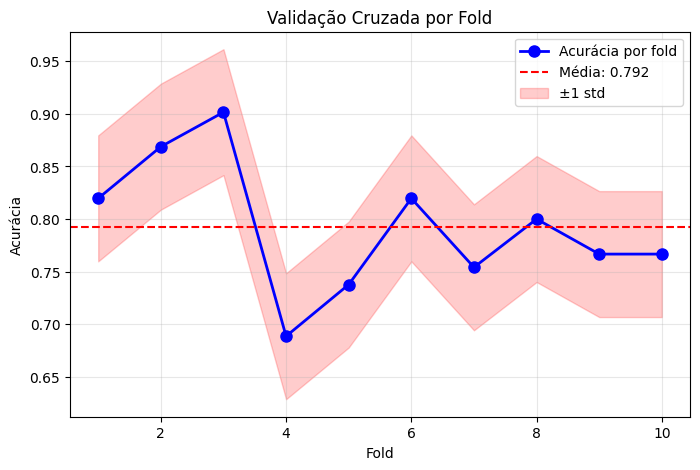

In [201]:
best_model = grid.best_estimator_

# executa validação cruzada k-fold explícita
scores = cross_val_score(best_model, X_tr, y_tr.ravel(), cv=10, scoring="accuracy")

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(scores) + 1), scores, 'bo-', linewidth=2, markersize=8, label="Acurácia por fold")

# média global (linha horizontal)
global_mean = scores.mean()
plt.axhline(y=global_mean, color='r', linestyle='--', label=f"Média: {global_mean:.3f}")

# faixa ±1 desvio-padrão
plt.fill_between(range(1, len(scores) + 1),
                 scores - scores.std(),
                 scores + scores.std(),
                 alpha=0.2, color='red', label="±1 std")

plt.xlabel("Fold")
plt.ylabel("Acurácia")
plt.title("Validação Cruzada por Fold")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Matriz de confusao (Cruzada)

In [193]:
nomes_classes = velha.iloc[:, [9]].values
classes_unicas = np.unique(nomes_classes)
#print(classes_unicas)
clf = grid.best_estimator_
clf.fit(X_tr,y_tr.ravel())
y_predicao = clf.predict(X_v)
cm_cru = confusion_matrix(y_v.ravel(), y_predicao)

VALIDACAO EXPLICITA (10%)

In [189]:
clf = MLPClassifier(hidden_layer_sizes=(40,), activation='relu', solver='sgd', max_iter=1000, learning_rate_init=0.1)
clf.fit(X_tr, y_tr.ravel())

y_val_pred = clf.predict(X_v)
acc_expl = accuracy_score(y_v, y_val_pred)
print("Acurácia na validação:", accuracy_score(y_v, y_val_pred))

Acurácia na validação: 0.7352941176470589


Matriz de confusao (Explicita)

In [191]:
nomes_classes = velha.iloc[:, [9]].values
classes_unicas = np.unique(nomes_classes)
#print(classes_unicas)

cm_expl = confusion_matrix(y_v.ravel(), y_val_pred)

Comparação das Matrizes de Confusão da Validações

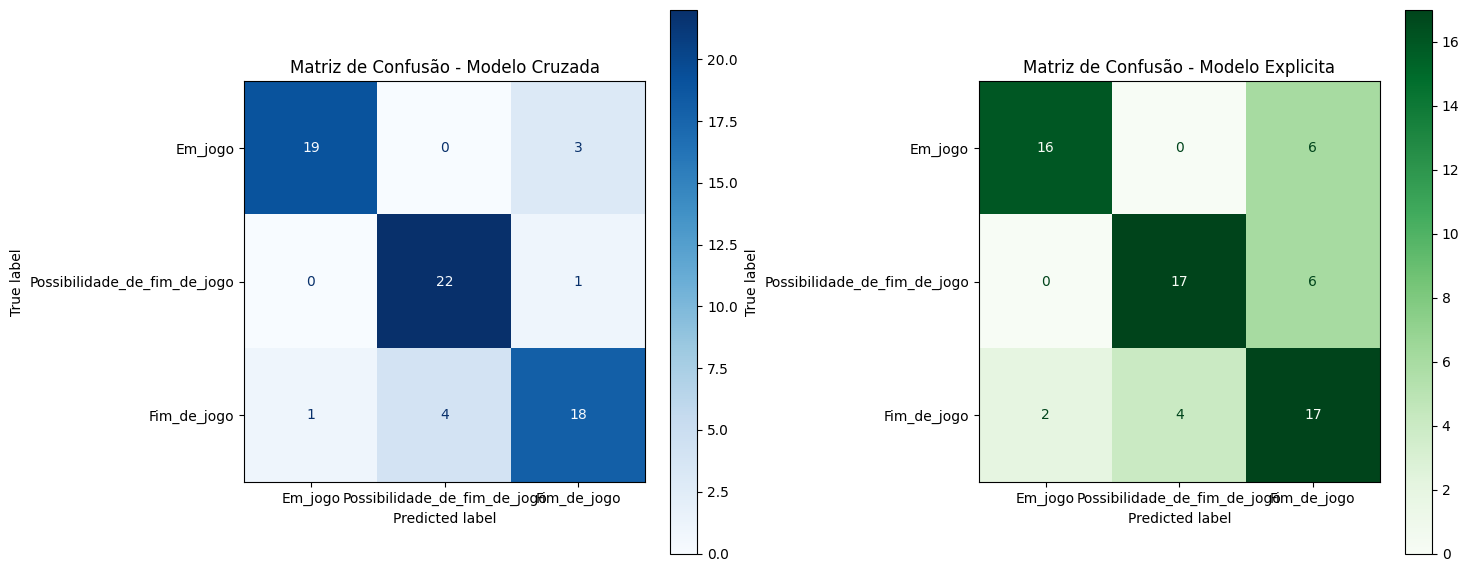

Relatório de Classificação - Modelo Cruzado:
                              precision    recall  f1-score   support

                     Em_jogo       0.95      0.86      0.90        22
Possibilidade_de_fim_de_jogo       0.85      0.96      0.90        23
                 Fim_de_jogo       0.82      0.78      0.80        23

                    accuracy                           0.87        68
                   macro avg       0.87      0.87      0.87        68
                weighted avg       0.87      0.87      0.87        68

Relatório de Classificação - Modelo Explicito:
                              precision    recall  f1-score   support

                     Em_jogo       0.89      0.73      0.80        22
Possibilidade_de_fim_de_jogo       0.81      0.74      0.77        23
                 Fim_de_jogo       0.59      0.74      0.65        23

                    accuracy                           0.74        68
                   macro avg       0.76      0.74      0.74    

In [194]:
nomes_classes = velha.iloc[:, [9]].values
classes_unicas = np.unique(nomes_classes)
#print(classes_unicas)
# usa DataFrame com nomes de features

# Comparação das matrizes de confusão
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Matriz original
disp1 = ConfusionMatrixDisplay(
    confusion_matrix=cm_cru, 
    display_labels=['Em_jogo', 'Possibilidade_de_fim_de_jogo', 'Fim_de_jogo']
)
disp1.plot(ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title('Matriz de Confusão - Modelo Cruzada')

# Matriz otimizada
disp2 = ConfusionMatrixDisplay(
    confusion_matrix=cm_expl, 
    display_labels=['Em_jogo', 'Possibilidade_de_fim_de_jogo', 'Fim_de_jogo']
)
disp2.plot(ax=axes[1], cmap='Greens', values_format='d')
axes[1].set_title('Matriz de Confusão - Modelo Explicita')

plt.tight_layout()
plt.show()

print("Relatório de Classificação - Modelo Cruzado:")
print(classification_report(y_v, y_predicao, target_names=['Em_jogo', 'Possibilidade_de_fim_de_jogo', 'Fim_de_jogo']))

print("Relatório de Classificação - Modelo Explicito:")
print(classification_report(y_v, y_val_pred, target_names=['Em_jogo', 'Possibilidade_de_fim_de_jogo', 'Fim_de_jogo']))



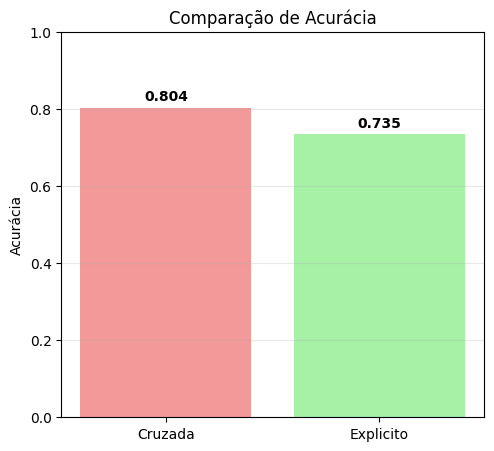

In [195]:
# Visualização da comparação de performance
plt.figure(figsize=(12, 5))

# Gráfico 1: Comparação de acurácias
plt.subplot(1, 2, 1)
models = ['Cruzada', 'Explicito']
accuracies = [acc_cru, acc_expl]
colors = ['lightcoral', 'lightgreen']

bars = plt.bar(models, accuracies, color=colors, alpha=0.8)
plt.title('Comparação de Acurácia')
plt.ylabel('Acurácia')
plt.ylim(0, 1)

# Adicionar valores nas barras
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

plt.grid(True, alpha=0.3, axis='y')

Executando a predição para as entradas (X) do conjunto de teste.

In [196]:
clf = grid.best_estimator_
clf.fit(X_tr, y_tr.ravel())
y_predicao = clf.predict(X_test)
print("Acurácia na validação:", accuracy_score(y_test, y_predicao))

Acurácia na validação: 0.76


Matriz de confusao dos testes

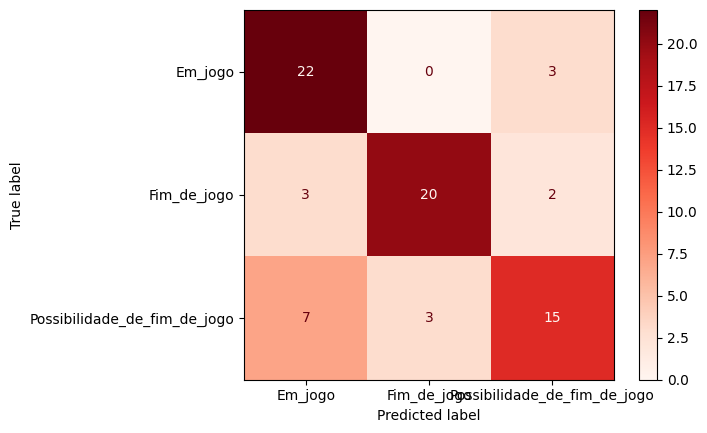

In [197]:
nomes_classes = velha.iloc[:, [9]].values
classes_unicas = np.unique(nomes_classes)

cm = confusion_matrix(y_test.ravel(), y_predicao)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes_unicas)
disp.plot(cmap='Reds')

Calcula as métricas conhecidas precision, recall e f-measure para o dataset de teste

In [198]:
print(f"Acurácia {accuracy_score(y_test, y_predicao)}")
print(classification_report(y_test, y_predicao))

Acurácia 0.76
                              precision    recall  f1-score   support

                     Em_jogo       0.69      0.88      0.77        25
                 Fim_de_jogo       0.87      0.80      0.83        25
Possibilidade_de_fim_de_jogo       0.75      0.60      0.67        25

                    accuracy                           0.76        75
                   macro avg       0.77      0.76      0.76        75
                weighted avg       0.77      0.76      0.76        75



Abaixo, exibimos as classes e os pesos (modelo) encontrado no treinamento.

In [199]:
print("Classes: ", clf.classes_ )
print("Melhor loss: ", clf.best_loss_)
print(clf.coefs_)
print(clf.intercepts_)
print(clf.get_params)

Classes:  ['Em_jogo' 'Fim_de_jogo' 'Possibilidade_de_fim_de_jogo']
Melhor loss:  0.38508083939004184
[array([[-6.34600687e-01,  1.02243633e-01, -4.74880891e-01,
        -5.51577498e-01, -3.68842644e-01, -1.48303263e-01,
         9.06684033e-02,  3.51291136e-01, -6.96593715e-01,
        -4.19569966e-01, -7.50721380e-02,  7.09421846e-01,
        -2.21858555e-02, -3.67336304e-01, -3.63889039e-01,
        -1.94870930e-01, -3.68443049e-02, -6.18127367e-03,
        -7.47626445e-01, -1.13853004e-01, -5.05176541e-01,
         2.55937829e-01, -3.27455813e-01, -2.15366310e-01,
         3.95257597e-02, -3.66596475e-01, -3.15302830e-01,
         7.64239757e-01,  5.20408865e-01,  1.53388416e-02,
        -3.99222594e-01, -9.48363508e-02,  7.28147012e-01,
        -8.36361745e-02,  1.34964253e-02, -2.45601578e-01,
         1.07314426e-01, -4.70679094e-01, -2.42328764e-01,
        -1.09735561e-01,  2.14159615e-01, -4.97022407e-01,
        -4.51684031e-01,  8.97201328e-02,  5.48495732e-01,
         1.82